# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．  
ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [3]:
%%bash
pip install gensim

  Running setup.py install for smart-open: started
    Running setup.py install for smart-open: finished with status 'done'


You are using pip version 18.1, however version 20.1b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import os
from gensim.models import KeyedVectors

unable to import 'smart_open.gcs', disabling that module


In [5]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [7]:
us = model['United_States']
print(us[:5])

[-0.03613281 -0.04833984  0.23535156  0.17480469 -0.14648438]


## 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [9]:
print(model.similarity('U.S.', 'United_States'))

0.73107743


## 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [10]:
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

## 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [12]:
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'])

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

## 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [41]:
file_name = 'question-words.txt'
with open ('question-words-ans.txt', 'w'):
    pass
with open(file_name) as rf, open('question-words-ans.txt', mode='a') as wf:
    i = 0
    for line in rf:
        i += 1
        if i == 1:
            continue
        try:
            v1, v2, v3, v4 = line.split(' ')
        except Exception as e:
            print(line)
            print(e)
            continue
        v4 = v4.replace('\n', '')
        most_similar = model.most_similar(positive=[v2, v3], negative=[v1], topn=1)
        word, similarity = most_similar[0]
        wf.write(' '.join([v1,v2,v3,v4, word, str(similarity)])+'\n')

: capital-world

not enough values to unpack (expected 4, got 2)


KeyboardInterrupt: 

In [42]:
%%bash
head -20 question-words-ans.txt

Athens Greece Baghdad Iraq Iraqi 0.6351870894432068
Athens Greece Bangkok Thailand Thailand 0.7137669324874878
Athens Greece Beijing China China 0.7235777974128723
Athens Greece Berlin Germany Germany 0.6734622120857239
Athens Greece Bern Switzerland Switzerland 0.4919748306274414
Athens Greece Cairo Egypt Egypt 0.7527809739112854
Athens Greece Canberra Australia Australia 0.583732545375824
Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
Athens Greece Havana Cuba Cuba 0.6460992097854614
Athens Greece Helsinki Finland Finland 0.6899983882904053
Athens Greece Islamabad Pakistan Pakistan 0.7233326435089111
Athens Greece Kabul Afghanistan Afghan 0.6160915493965149
Athens Greece London England Britain 0.5646188259124756
Athens Greece Madrid Spain Spain 0.703661322593689
Athens Greece Moscow Russia Russia 0.7382972240447998
Athens Greece Oslo Norway Norway 0.6470743417739868
Athens Greece Ottawa Canada Canada 0.5912168025970459
Athens Greece Paris France France 0.6724624633789062
Ath

## 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [43]:
import pandas as pd

In [44]:
df = pd.read_csv('question-words-ans.txt', header=None, sep=' ')
df[df[3] == df[4]].sum() / df.shape[0]

TypeError: unsupported operand type(s) for /: 'str' and 'int'

## 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [45]:
df = pd.read_csv('wordsim353/combined.csv')

In [46]:
df.head()

,Word 1,Word 2,Human (mean)
0,love,sex,6.77
1,tiger,cat,7.35
2,tiger,tiger,10.00
3,book,paper,7.46
4,computer,keyboard,7.62


In [47]:
df.shape

(353, 3)

In [62]:
def calcSim(row):
    w1 = row['Word 1']
    w2 = row['Word 2']
    return model.similarity(w1, w2)

In [64]:
df['sim'] = df.apply(calcSim, axis=1)

In [66]:
df[['Human (mean)', 'sim']].corr(method='spearman')

,Human (mean),sim
Human (mean),1.000000,0.700017
sim,0.700017,1.000000


## 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [92]:
from sklearn.cluster import KMeans
import numpy as np
# sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300,
#                        tol=0.0001,precompute_distances='auto', verbose=0,
#                        random_state=None, copy_x=True, n_jobs=1)

In [68]:
country_df = pd.read_table('countries.tsv')

In [69]:
country_df

,Short name,Official name,ISO3,ISO2,UNI,UNDP,FAOSTAT,GAUL
0,Afghanistan,the Islamic Republic of Afghanistan,AFG,AF,4,AFG,2,1
1,Albania,the Republic of Albania,ALB,AL,8,ALB,3,3
2,Algeria,the People's Democratic Republic of Algeria,DZA,DZ,12,DZA,4,4
3,Andorra,the Principality of Andorra,AND,AD,20,AND,6,7
4,Angola,the Republic of Angola,AGO,AO,24,AGO,7,8
...,...,...,...,...,...,...,...,...
191,Venezuela (Bolivarian Republic of),the Bolivarian Republic of Venezuela,VEN,VE,862,VEN,236,263
192,Viet Nam,the Socialist Republic of Viet Nam,VNM,VN,704,VNM,237,264
193,Yemen,the Republic of Yemen,YEM,YE,887,YEM,249,269
194,Zambia,the Republic of Zambia,ZMB,ZM,894,ZMB,251,270


In [73]:
country_df['Short name'].values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland',
       'France',

In [95]:
c_name = []
c_vec = []
for c in country_df['Short name'].values:
    if c in model.vocab:
        c_name.append(c)
        c_vec.append(model[c])

In [99]:
pred = KMeans(n_clusters=5, random_state=0).fit_predict(np.array(c_vec))

In [100]:
pred

array([2, 0, 3, 1, 3, 1, 0, 1, 1, 0, 4, 2, 2, 4, 0, 1, 4, 3, 2, 3, 1, 0,
       3, 2, 3, 1, 3, 1, 2, 1, 3, 3, 0, 1, 0, 0, 1, 3, 4, 1, 2, 3, 0, 3,
       4, 1, 1, 3, 3, 0, 1, 3, 0, 4, 1, 3, 4, 3, 1, 0, 0, 2, 2, 2, 1, 2,
       1, 4, 1, 2, 0, 3, 4, 2, 2, 0, 2, 3, 3, 2, 0, 1, 3, 3, 2, 4, 3, 0,
       3, 4, 1, 1, 2, 0, 1, 3, 2, 3, 4, 2, 1, 1, 3, 3, 4, 1, 2, 2, 4, 1,
       1, 1, 1, 0, 1, 2, 0, 3, 4, 3, 0, 4, 2, 0, 0, 3, 1, 3, 4, 1, 1, 2,
       2, 3, 4, 4, 3, 0, 2, 4, 3, 0, 1, 2, 4, 2, 3, 3], dtype=int32)

## 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

In [102]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:
c_name = []
c_vec = []
for c in country_df['Short name'].values:
    if c in model.vocab:
        c_name.append(c)
        c_vec.append(model[c])

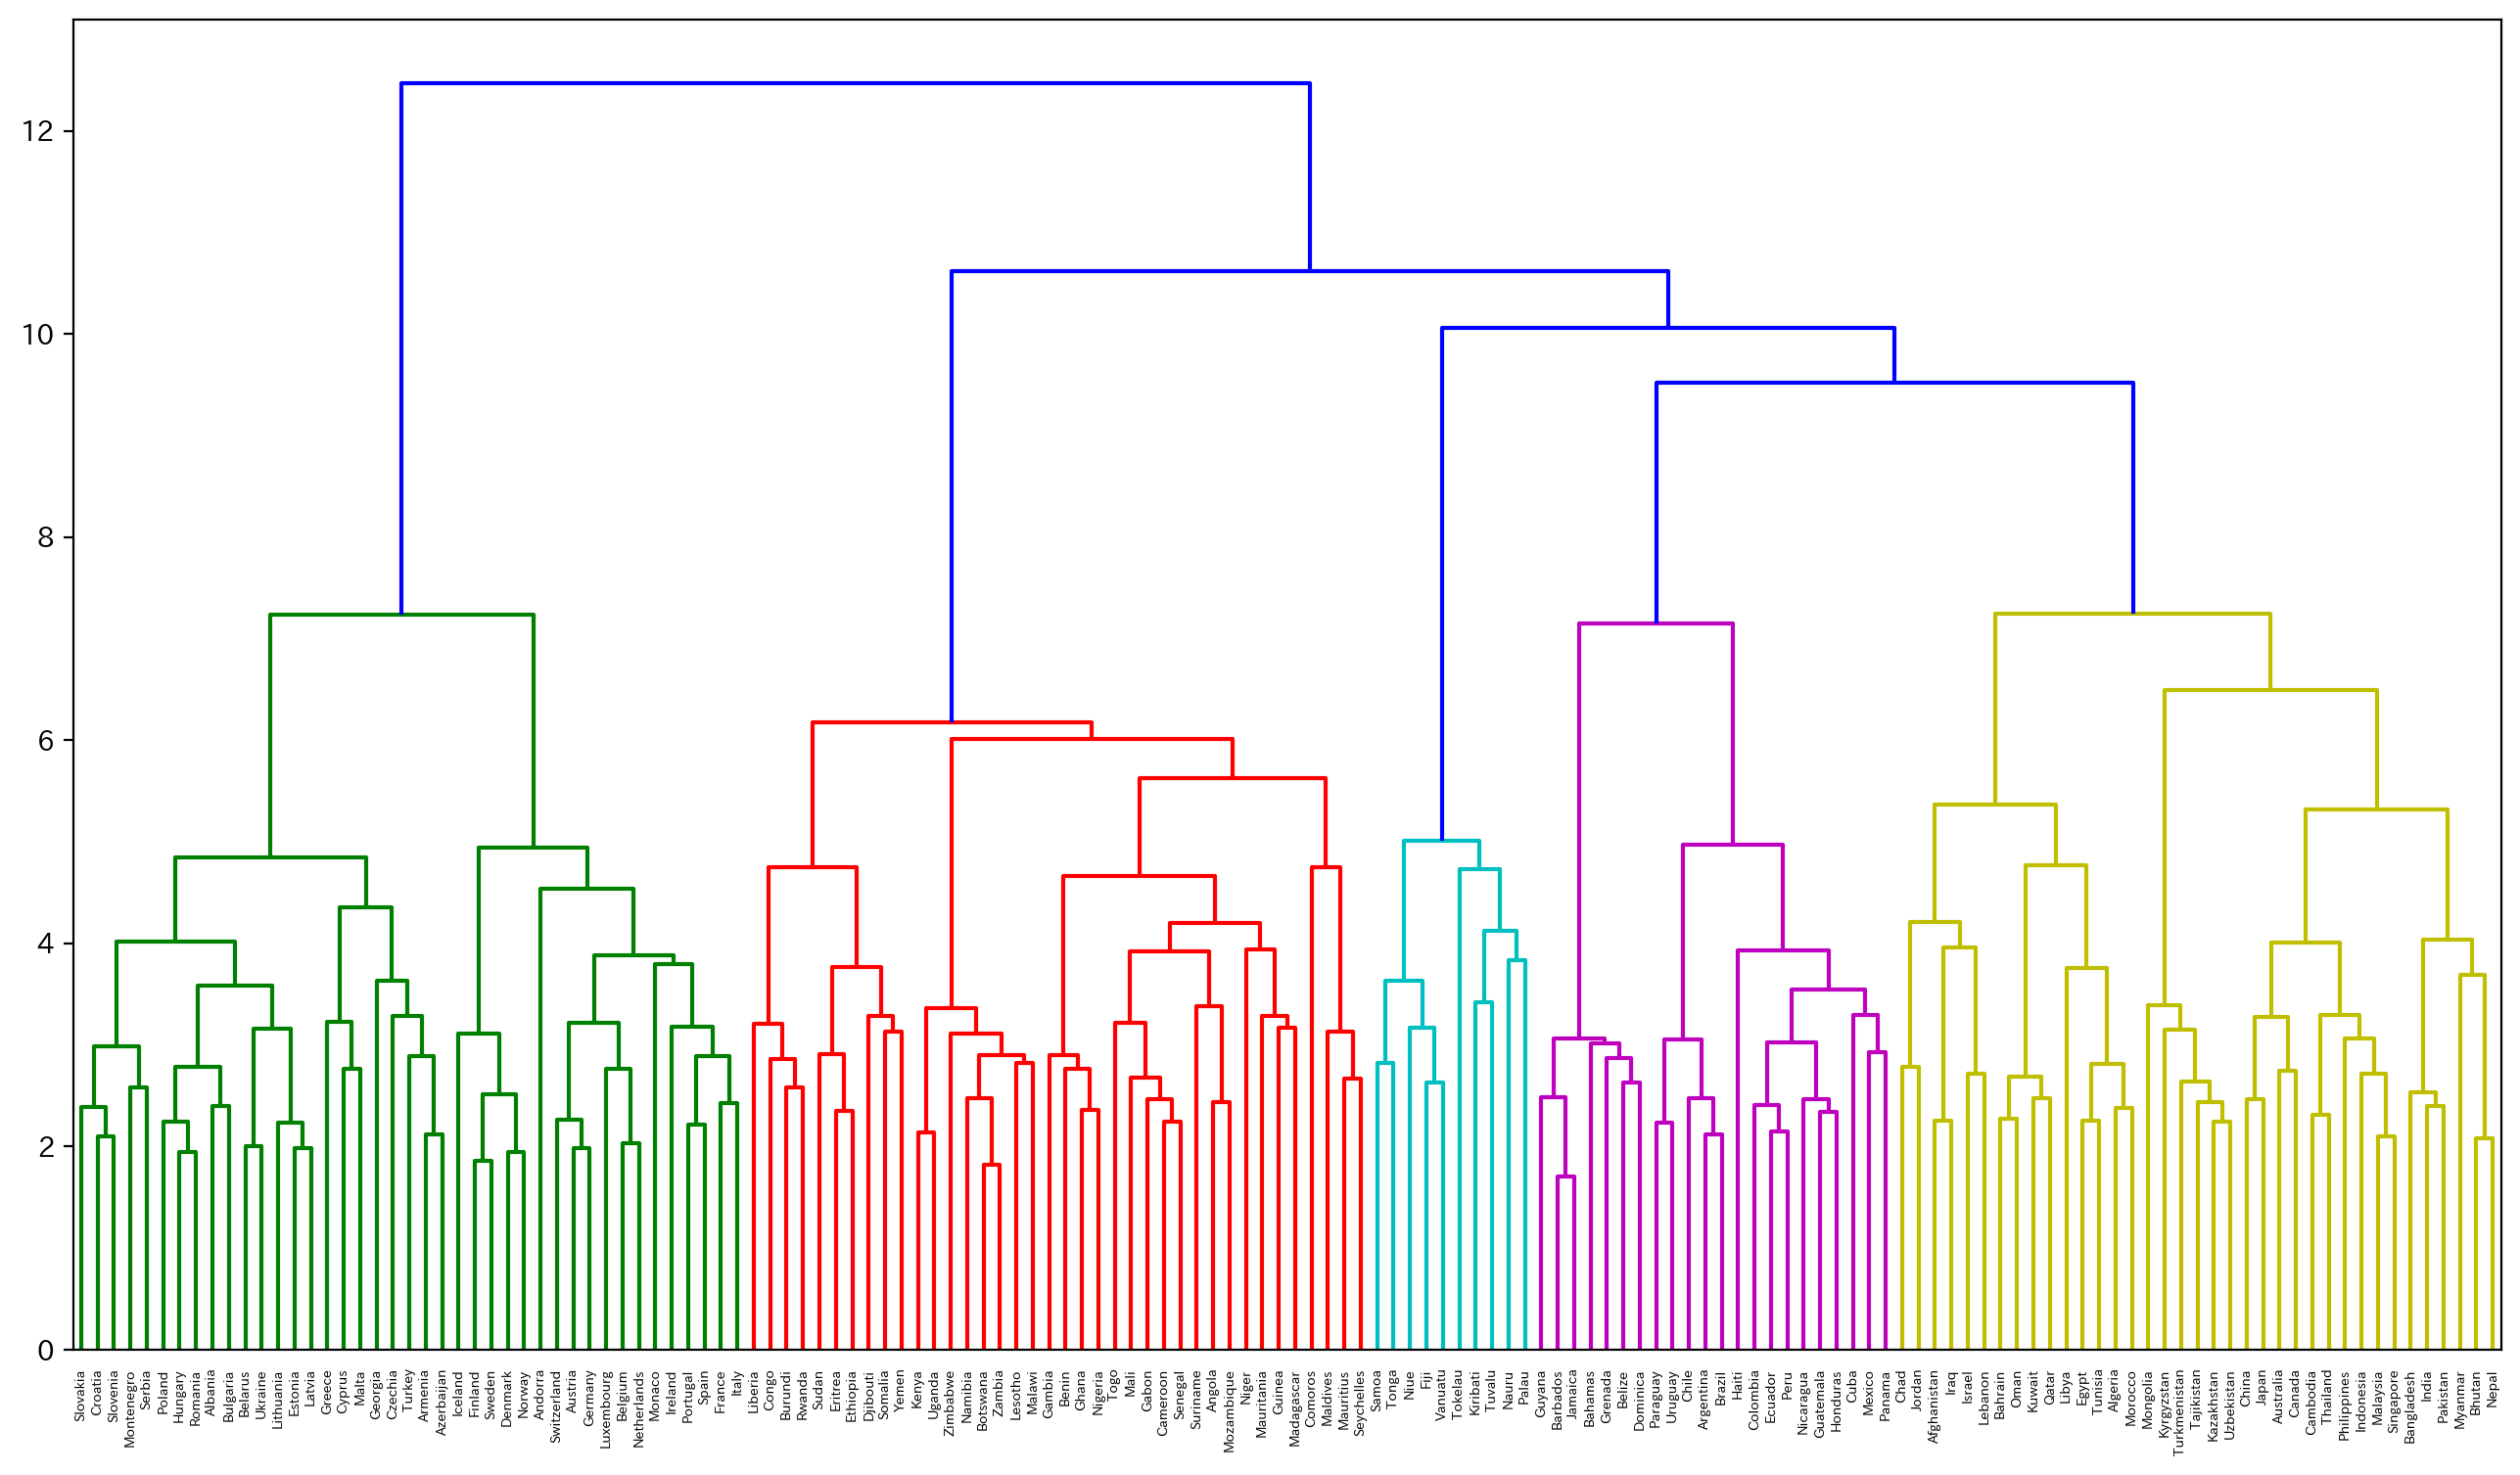

In [104]:
linkage_result = linkage(c_vec, method='ward', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=c_name)
plt.show()

## 69. t-SNEによる可視化
国名に関する単語ベクトルのベクトル空間をt-SNEで可視化せよ．

In [112]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

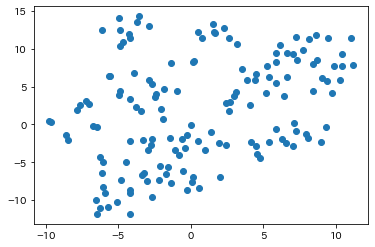

In [113]:
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(c_vec)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.show()